In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from visualize_samples import plot_fp_act
import pickle
%matplotlib inline

In [2]:
actual_track_datapath = '../../DATA/DeepTP/processed_flight_tracks.csv'
flight_plan_datapath = '../../DATA/DeepTP/processed_flight_plans.csv'
flight_plan_utilize_datapath = '../../DATA/DeepTP/IAH_BOS_Act_Flt_Trk_20130101_1231.CSV'

act_track_data = pd.read_csv(actual_track_datapath, header = 0)
FP_track = pd.read_csv(flight_plan_datapath)
FP_utlize = pd.read_csv(flight_plan_utilize_datapath, header = 0, usecols = [19,1])
feed_data = pd.read_csv('../../DATA/DeepTP/test_flight_tracks.csv', header = 0)
feed_fp = pd.read_csv('../../DATA/DeepTP/test_flight_plans.csv', header = 0)
pred, predicted_tracks_cov, buffer_total_logprob, buffer_pi_prob, predicted_matched_info = pickle.load(open('sample_results/lite_ctrl_samp_mu_cov_test_delta_s2_w80_best.pkl', 'rb'))

/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


457 flights filed flight plan FP_00002


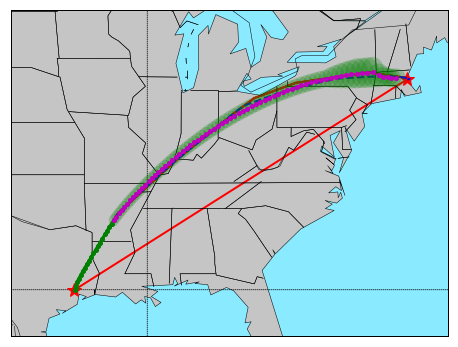

In [3]:
plot_track, plot_fp = plot_fp_act('FP_00002', 
                                   FP_utlize, 
                                   act_track_data.loc[act_track_data.FID == 20130118900394], 
                                   feed_fp, 
                                   feed_track = feed_data.loc[feed_data.FID==20130118900394], 
                                   pred_track=None, 
                                   pred_track_mu = pred[:, 20:, :],
                                   pred_track_cov = predicted_tracks_cov,
                                   k = 8, 
                                   nstd = 3,
                                   sort = False)

/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


567 flights filed flight plan FP_00001


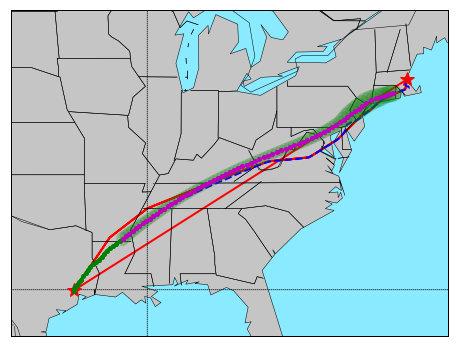

In [4]:
plot_track, plot_fp = plot_fp_act('FP_00001', 
                                  FP_utlize, 
                                  act_track_data.loc[act_track_data.FID == 20130905466292], 
                                  feed_fp, 
                                  feed_track = feed_data.loc[feed_data.FID==20130905466292], 
                                  pred_track=None, 
                                  pred_track_mu = pred[:, 20:, :],
                                  pred_track_cov = predicted_tracks_cov,
                                  k = 44, 
                                  nstd = 3,
                                  sort = False)

/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


215 flights filed flight plan FP_00003


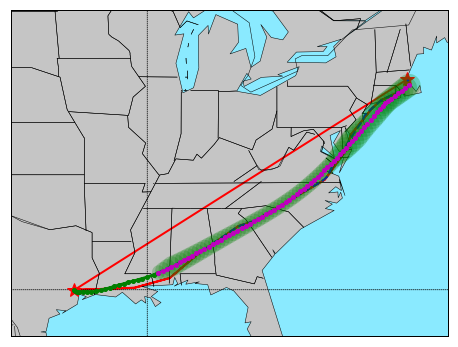

In [6]:
plot_track, plot_fp = plot_fp_act('FP_00003', 
                                  FP_utlize, 
                                  act_track_data.loc[act_track_data.FID == 20131109716864], 
                                  feed_fp, 
                                  feed_track = feed_data.loc[feed_data.FID==20131109716864], 
                                  pred_track=None, 
                                  pred_track_mu = pred[:, 20:, :],
                                  pred_track_cov = predicted_tracks_cov,
                                  k = 53,
                                  nstd = 3,
                                  sort = False)

In [7]:
from kalman_filter import RTS_smoother
Q_err = 1e-6
Q = np.zeros(shape = predicted_tracks_cov.shape)
Q[:, :, ] = np.eye(5)
Q[:, :, :2, :2] = Q[:, :, :2, :2] * Q_err * 1000
Q[:, :, 2, 2] = 1.
Q[:, :, 3:, 3:] = Q[:, :, 3:, 3:] * Q_err
delta_t = 120./600
A = np.array([[1., 0., 0., delta_t, 0], 
                 [0., 1., 0., 0., delta_t],
                 [0., 0., 1., 0., 0.],
                 [0., 0., 0., 1., 0.],
                 [0., 0., 0., 0., 1.]])
rts_states, rts_covs = RTS_smoother(batch_kf_state = pred[:, 20:, [0,1,2,4,5]],
                            batch_kf_cov = predicted_tracks_cov,
                            batch_Q = Q,
                            A = A)

/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


215 flights filed flight plan FP_00003


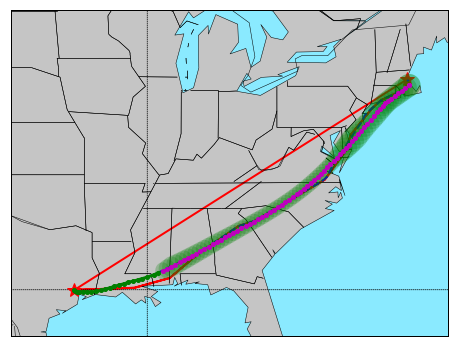

In [8]:
plot_track, plot_fp = plot_fp_act('FP_00003', 
                                  FP_utlize, 
                                  act_track_data.loc[act_track_data.FID == 20131109716864], 
                                  feed_fp, 
                                  feed_track = feed_data.loc[feed_data.FID==20131109716864], 
                                  pred_track=None, 
                                  pred_track_mu = rts_states,
                                  pred_track_cov = rts_covs,
                                  k = 53,
                                  nstd = 3,
                                  sort = False)